In [376]:
#Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [396]:
#Reading the data
train_data=pd.read_csv("train.csv", low_memory=False)
store_data=pd.read_csv("store.csv")
test_data=pd.read_csv("test.csv")

In [378]:
#preview the data
train_data.head(20)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [379]:
store_data.head(20)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [380]:
test_data.head(20)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
5,6,10,4,2015-09-17,1.0,1,0,0
6,7,11,4,2015-09-17,1.0,1,0,0
7,8,12,4,2015-09-17,1.0,1,0,0
8,9,13,4,2015-09-17,1.0,1,0,0
9,10,14,4,2015-09-17,1.0,1,0,0


In [397]:
#Data preprocessing begins here
#the information about the stores such as holidays, promos, etc and the information about the sales,competetion_distance,store_type etc are available in different datasets, we merge them to make the training data easier to read
print ("Merging the stores and sales data")
combined_train_data=pd.merge(train_data,store_data, on="Store")

Merging the stores and sales data


In [4]:
print ("Previewing the combined data")
combined_train_data.head(400)

Previewing the combined data


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
5,1,7,2015-07-26,0,0,0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
6,1,6,2015-07-25,4364,500,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
7,1,5,2015-07-24,3706,459,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
8,1,4,2015-07-23,3769,503,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
9,1,3,2015-07-22,3464,463,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [7]:
#Handling the NaN values
#Checking if there are any NaN rows
combined_train_data.isnull().values.any()

True

In [261]:
#There are some NaN in the data, such as promos, where if promo is not offered by the store, the NaN value is used in its place
#Replacing these NaN values with 0
store_data.fillna(0, inplace=True)

In [89]:
combined_train_data.head(50)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
5,1,7,2015-07-26,0,0,0,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
6,1,6,2015-07-25,4364,500,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
7,1,5,2015-07-24,3706,459,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
8,1,4,2015-07-23,3769,503,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
9,1,3,2015-07-22,3464,463,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [90]:
#Checking if there are any NaN values
combined_train_data.isnull().values.any()

False

In [9]:
#Reformating the date - from YYYY-MM-DD to DD-MM-YYYY
#First need to change the format of 'Date' Column to datetime
combined_train_data['Date'] = pd.to_datetime(combined_train_data['Date'], errors='coerce')
combined_train_data['Date'] = combined_train_data['Date'].dt.strftime('%d-%m-%Y')

In [92]:
combined_train_data.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Store,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
DayOfWeek,5,4,3,2,1,7,6,5,4,3,2,1,7,6,5,4,3,2,1,7
Date,31-07-2015,30-07-2015,29-07-2015,28-07-2015,27-07-2015,26-07-2015,25-07-2015,24-07-2015,23-07-2015,22-07-2015,21-07-2015,20-07-2015,19-07-2015,18-07-2015,17-07-2015,16-07-2015,15-07-2015,14-07-2015,13-07-2015,12-07-2015
Sales,5263,5020,4782,5011,6102,0,4364,3706,3769,3464,3558,4395,0,4406,4852,4427,4767,5042,5054,0
Customers,555,546,523,560,612,0,500,459,503,463,469,526,0,512,519,517,550,544,553,0
Open,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0
Promo,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
StateHoliday,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
SchoolHoliday,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
StoreType,c,c,c,c,c,c,c,c,c,c,c,c,c,c,c,c,c,c,c,c


In [6]:
#Creating seperate columns for month and Year to analyze the data better.
combined_train_data['year'] = pd.DatetimeIndex(combined_train_data['Date']).year
combined_train_data['month'] = pd.DatetimeIndex(combined_train_data['Date']).month

In [94]:
#preview of the data after reformatting the date
combined_train_data.head(20)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month
0,1,5,31-07-2015,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
1,1,4,30-07-2015,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
2,1,3,29-07-2015,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
3,1,2,28-07-2015,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
4,1,1,27-07-2015,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
5,1,7,26-07-2015,0,0,0,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
6,1,6,25-07-2015,4364,500,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
7,1,5,24-07-2015,3706,459,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
8,1,4,23-07-2015,3769,503,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
9,1,3,22-07-2015,3464,463,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7


In [95]:
#Converting 'DayOfWeek' from numerical form to weekday name, so as to make the data easier to understand
combined_train_data['Date'] = pd.to_datetime(combined_train_data['Date'])
combined_train_data['DayOfWeek'] = combined_train_data['Date'].dt.weekday_name

In [96]:
combined_train_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month
0,1,Friday,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
1,1,Thursday,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
2,1,Wednesday,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
3,1,Tuesday,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7
4,1,Monday,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7


In [327]:
(combined_train_data['CompetitionDistance'] == 0).any()

False

In [308]:
#Some CompetitionDistance values are blank in the Data, We have assumed this to mean that the data of nearest competetor stores couldn't be found, therefore, these values are replaced with Median distance. '
median_cd = combined_train_data['CompetitionDistance'].median(skipna=True)

In [310]:
combined_train_data['CompetitionDistance']=combined_train_data.CompetitionDistance.mask(combined_train_data.CompetitionDistance == 0,median_cd)

In [9]:
# remove all rows(store,date) that are closed as this data doesn't help in predicting the sales on the working days
combined_train_data = combined_train_data[combined_train_data["Open"] != 0]

In [100]:
#Performing the same merge operation on test data
combined_test_data=pd.merge(test_data,store_data, on="Store")

In [77]:
#Preview the test data
print ("Previewing the combined test data")
combined_test_data.head()

Previewing the combined test data


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,857,1,3,2015-09-16,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1713,1,2,2015-09-15,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,2569,1,1,2015-09-14,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,3425,1,7,2015-09-13,0.0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [106]:
#Handling the NaN values, first checking if there are any NaN
combined_test_data.isnull().values.any()

True

In [111]:
#Replacing the NaN values with 0
combined_test_data.fillna(0, inplace=True)

In [ ]:
#checking again for NaN

In [112]:
combined_test_data.isnull().values.any()

False

In [113]:
#Reformating the date - from YYYY-MM-DD to DD-MM-YYYY for better readability
#First need to change the format of 'Date' Column to datetime
combined_test_data['Date'] = pd.to_datetime(combined_test_data['Date'], errors='coerce')
combined_test_data['Date'] = combined_test_data['Date'].dt.strftime('%d-%m-%Y')

In [115]:
#Preview the test data
print ("Previewing the combined test data")
combined_test_data.head()

Previewing the combined test data


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,17-09-2015,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,857,1,3,16-09-2015,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1713,1,2,15-09-2015,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,2569,1,1,14-09-2015,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,3425,1,7,13-09-2015,0.0,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [140]:
#Converting 'DayOfWeek' from numerical form to weekday name, so as to make the data easier to understand
combined_test_data['Date'] = pd.to_datetime(combined_test_data['Date'])
combined_test_data['DayOfWeek'] = combined_test_data['Date'].dt.weekday_name

In [117]:
#Drop the days where the store has remained closed as there is no point in that data being present for the test data
combined_test_data = combined_test_data[combined_test_data["Open"] != 0]

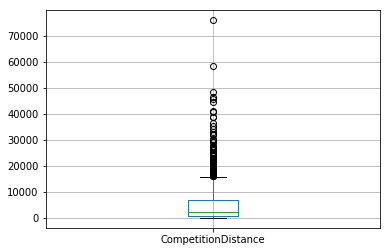

In [13]:
#Drawing BoxPlot to represent outliers
data=store_data[['Store','CompetitionDistance']]
data.boxplot('CompetitionDistance')

In [350]:
# Python Function to remove outliers
def remove_outliers(df, column, min_val, max_val):
    col_values = df[column].values
    df[column] = np.where(np.logical_or(col_values<=min_val, col_values>=max_val), np.NaN, col_values)
    return df

In [382]:
#Since the Data is very large, it isn't easy to observe and detect outliers, therefore we have applied the turkey method of detecting the outliers using Inter-Quartile-range(IQR)
#The formulas are:
#Low outliers = Q1 – 1.5(Q3 – Q1) = Q1 – 1.5(IQR)
#High outliers = Q3 + 1.5(Q3 – Q1) = Q3 + 1.5(IQR)
#Where:
#Q1 = first quartile
#Q3 = third quartile
#IQR = Interquartile range
Q1 = combined_train_data['CompetitionDistance'].quantile(0.25)
Q3 = combined_train_data['CompetitionDistance'].quantile(0.75)
IQR = Q3 - Q1
print ("IQR is ")
print (IQR)
max_value= Q3 + 1.5*IQR
print ("Max Value is")
print (max_value)

#Since all the CompetitionDistance Data are positive, there are no "outliers" (by the present definition) on the low side.
#Therfore we can assign the min_value to 0
min_value=200

IQR is 
6180.0
Max Value is
16160.0


In [398]:
combined_train_data = remove_outliers(df = combined_train_data, column = 'CompetitionDistance', min_val = min_value, max_val = 30000)

c:\users\girish\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less_equal
  after removing the cwd from sys.path.
c:\users\girish\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater_equal
  after removing the cwd from sys.path.


In [384]:
print("Preview the data after removal of outliers")
combined_train_data.head(30)

Preview the data after removal of outliers


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
5,1,7,2015-07-26,0,0,0,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
6,1,6,2015-07-25,4364,500,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
7,1,5,2015-07-24,3706,459,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
8,1,4,2015-07-23,3769,503,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
9,1,3,2015-07-22,3464,463,1,0,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [142]:
print("performing the same removal of outliers for test data")

performing the same removal of outliers for test data


In [10]:
combined_test_data = remove_outliers(df = combined_test_data, column = 'CompetitionDistance', min_val = min_value, max_val = max_value)

NameError: name 'remove_outliers' is not defined

In [399]:
#Taking the information about stores, Customers and CompetitionDistance 
df=combined_train_data[['Store','Customers','CompetitionDistance']]

In [400]:
df=df.groupby(['Store','CompetitionDistance'],as_index=False)['Customers'].sum()

In [401]:
df.head()

,Store,CompetitionDistance,Customers
0,1,1270.0,440523
1,2,570.0,457855
2,3,14130.0,584310
3,4,620.0,1036254
4,5,29910.0,418588


In [402]:
l =['0-2000','2000-4000','4000-6000','6000-8000','8000-10000','10000-12000','12000-14000','14000-16000','16000-18000','18000-20000','20000-22000','22000-24000','24000-26000','26000-28000','28000-30000']  
b = [0,2000,4000,6000,8000,10000,12000,14000,16000,18000,20000,22000,24000,26000,28000,30000]
df = df.groupby(pd.cut(df['CompetitionDistance'], bins=b, labels=l))['Customers'].sum().fillna(0).reset_index()

In [403]:
df.head(20)

,CompetitionDistance,Customers
0,0-2000,262193519
1,2000-4000,103454299
2,4000-6000,53514645
3,6000-8000,28506702
4,8000-10000,27548402
5,10000-12000,11615833
6,12000-14000,12208906
7,14000-16000,13485316
8,16000-18000,12538128
9,18000-20000,12158500


In [404]:
dfs=store_data[['Store','CompetitionDistance']]

In [405]:
l =['0-2000','2000-4000','4000-6000','6000-8000','8000-10000','10000-12000','12000-14000','14000-16000','16000-18000','18000-20000','20000-22000','22000-24000','24000-26000','26000-28000','28000-30000']  
b = [0,2000,4000,6000,8000,10000,12000,14000,16000,18000,20000,22000,24000,26000,28000,30000]
dfs = dfs.groupby(pd.cut(dfs['CompetitionDistance'], bins=b, labels=l))['Store'].count().fillna(0).reset_index()

In [406]:
df=pd.merge(df,dfs,on="CompetitionDistance")

In [407]:
df.head()

,CompetitionDistance,Customers,Store
0,0-2000,262193519,502
1,2000-4000,103454299,202
2,4000-6000,53514645,103
3,6000-8000,28506702,60
4,8000-10000,27548402,58


In [408]:
df['Customer/Store'] = df['Customers']/df['Store']

In [409]:
df.head(14)

,CompetitionDistance,Customers,Store,Customer/Store
0,0-2000,262193519,502,522297.846614
1,2000-4000,103454299,202,512149.995050
2,4000-6000,53514645,103,519559.660194
3,6000-8000,28506702,60,475111.700000
4,8000-10000,27548402,58,474972.448276
5,10000-12000,11615833,26,446762.807692
6,12000-14000,12208906,27,452181.703704
7,14000-16000,13485316,26,518666.000000
8,16000-18000,12538128,26,482235.692308
9,18000-20000,12158500,25,486340.000000


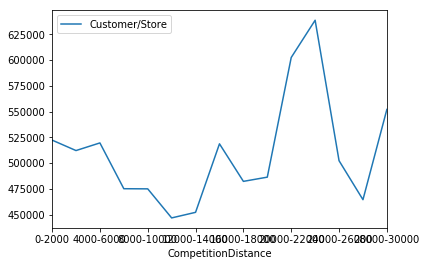

In [410]:
df.plot(x='CompetitionDistance',y='Customer/Store')

In [354]:
df = remove_outliers(df = store_data, column = 'CompetitionDistance', min_val = min_value, max_val = max_value)

c:\users\girish\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less_equal
  after removing the cwd from sys.path.
c:\users\girish\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater_equal
  after removing the cwd from sys.path.
